# Projeto final do curso de Python focado em Ciência de Dados pela EBAC

Este módulo do curso "Profissão: Cientista de Dados" destaca a importância do Python como uma ferramenta fundamental para análise e manipulação de dados. Python é uma linguagem de programação versátil, com uma sintaxe simples e legível, o que a torna acessível para iniciantes, mas poderosa o suficiente para lidar com tarefas complexas de análise de dados.

Existem várias razões pelas quais Python é amplamente utilizado na ciência de dados:

* Ecossistema robusto de bibliotecas: Python possui uma vasta gama de bibliotecas especializadas em diferentes aspectos da ciência de dados, como Pandas para manipulação de dados tabulares, NumPy para computação numérica, Matplotlib e Seaborn para visualização de dados, Scikit-learn para aprendizado de máquina, TensorFlow e PyTorch para aprendizado profundo, entre muitas outras.

* Comunidade ativa e suporte: Python tem uma comunidade ativa de desenvolvedores e cientistas de dados que contribuem para o desenvolvimento de bibliotecas, fornecem suporte e compartilham conhecimento por meio de fóruns, grupos de discussão e conferências.

* Facilidade de aprendizado e uso: A sintaxe clara e concisa do Python facilita a aprendizagem para iniciantes em programação e permite que os cientistas de dados se concentrem mais na lógica do problema do que na sintaxe da linguagem.

* Flexibilidade e adaptabilidade: Python é uma linguagem flexível que pode ser usada em uma variedade de contextos, desde análise exploratória de dados até o desenvolvimento de modelos de aprendizado de máquina e aplicativos web interativos.

* Integração com outras tecnologias: Python se integra bem com outras tecnologias e ferramentas comumente usadas na ciência de dados, como bancos de dados relacionais e não relacionais, sistemas de big data, ferramentas de visualização e ambientes de desenvolvimento.

Em resumo, o Python desempenha um papel fundamental no ecossistema da ciência de dados, oferecendo uma solução completa e poderosa para explorar, analisar e extrair insights valiosos de grandes volumes de dados em uma ampla variedade de domínios.

Criado por: Iago Barbosa

# Parte 1: Exploração dos dados

Os dados fornecem informações sobre os clientes de uma instituição financeira. Nosso foco principal está na segunda coluna, denominada "default", a qual indica se um cliente está em dia com suas obrigações financeiras (default = 0) ou se está inadimplente (default = 1). Nosso objetivo é compreender os motivos pelos quais um cliente deixa de cumprir com seus compromissos financeiros, levando em consideração diversos atributos, como renda, nível de escolaridade e atividades financeiras.

In [1]:
# Bibliotecas utilizadas:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Arquivo de banco de dados para análise (identificando dados faltantes como "na"):

df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

# Amostra da base:

df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Na base de dados em questão, o atributo que é de interesse é o "default" (variável resposta), que indica se o cliente é adimplente ou inadimplente:

* Cliente inadimplente = 1
* Cliente adimplente = 0

# #2 Explorando os Dados
Compreendendo os dados visualizados previamente em relação à porcentagem de inadimplência, natureza dos dados e informações ausentes.

2.1 Porcentagem de adimplência e inadimplência.

In [2]:

# Identificando o percentual de clientes inandimplentes e adimplentes:

df.shape
df[df['default'] == 0].shape
df[df['default'] == 1].shape

qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão total de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão total de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão total de clientes adimplentes é de 83.93%
A proporcão total de clientes inadimplentes é de 16.07%


* A proporcão total de clientes adimplentes é de 83.93%

* A proporcão total de clientes inadimplentes é de 16.07%

2.2 Natureza dos dados

In [3]:
# Dados categóricos:

df.dtypes
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [4]:
# Dados numéricos:

df.dtypes
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,1.606596e-01,3.672348e-01,0.0,0.0,0.0,0.0,1.0
idade,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,6.485869e+01,2.347257e+01,10.0,45.0,67.0,81.0,139.0


In [5]:
# Identificando as colunas com dados faltantes:

df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [6]:
# Percentual total de dados faltantes (na):

def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [7]:
# Percentual de dados faltantes dos adimplentes:

stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [8]:
# Percentual de dados faltantes dos inadimplentes:

stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# #3 Retificação dos dados
No segundo item, foram identificados dados com tipos incorretos e ausentes. Os dados "limite_credito" e "valor_transacoes_12m" estão inicialmente formatados como "object" de acordo com a convenção brasileira para números. É necessário ajustá-los para o formato americano reconhecido pelo Python.

A proporção de dados ausentes foi equilibrada entre clientes adimplentes e inadimplentes, como visto anteriormente, o que permite a exclusão desses clientes da análise com segurança. Além da exclusão, é necessário apresentar a porcentagem de clientes excluídos para fins de confirmação.

3.1 Retificando os tipos dos dados

In [9]:
# Transformando os dados com tipos errados (números de objetc para float):

fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Excluindo os dados ausentes (NA)

In [10]:
# Utilizando o método dropna para excluir os dados faltantes:

df.dropna(inplace=True)

# Comparando os percentuais de adimplentes e inadimplentes na base original versus a base nova (tratada e corrigida):

qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão da base original de clientes adimplentes era de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão da base original de clientes inadimplentes era de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão da base original de clientes adimplentes era de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão da base original de clientes inadimplentes era de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


# #4 Análise dos dados

In [11]:
# Categorizando os clientes adimplentes e inadimplentes

df_adimplente = df[df['default'] == 0]

df_inadimplente = df[df['default'] == 1]

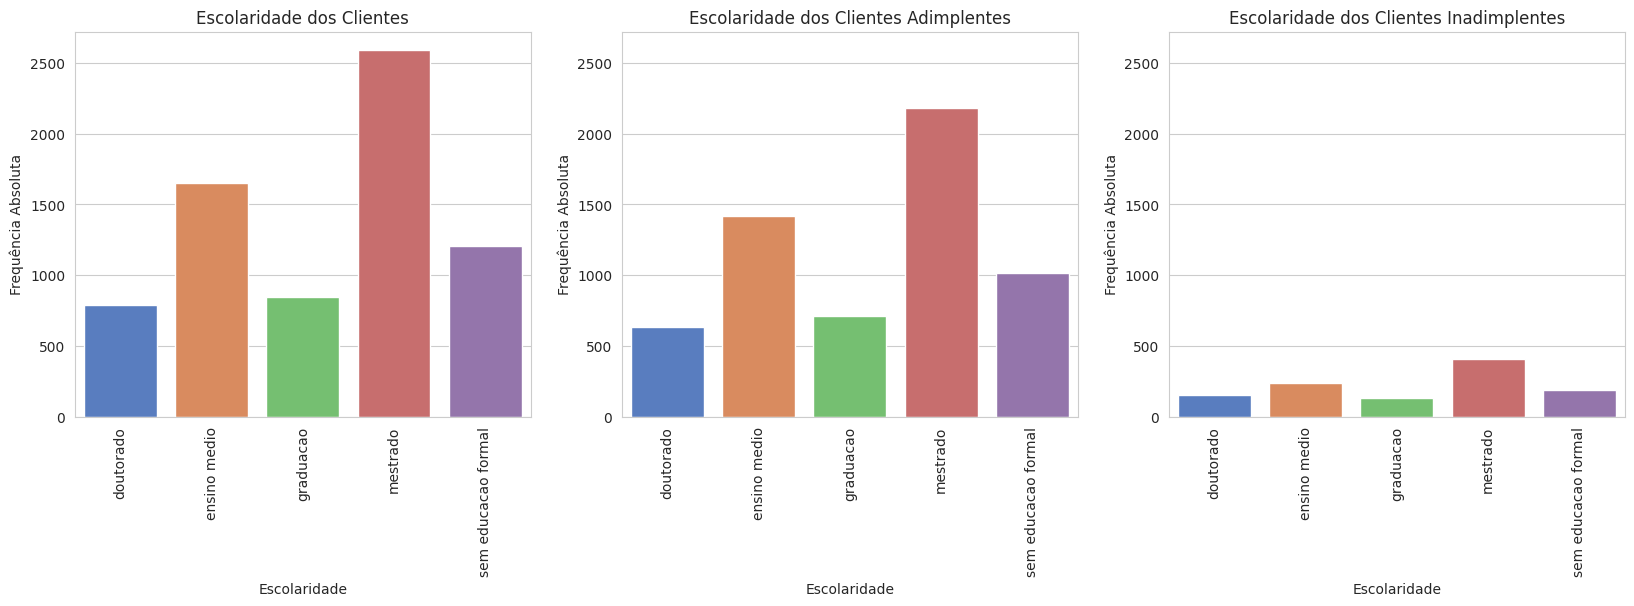

In [12]:
# Analisando a escolaridade:

coluna = "escolaridade"
titulos = [
    "Escolaridade dos Clientes",
    "Escolaridade dos Clientes Adimplentes",
    "Escolaridade dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo], palette="muted")
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

A maioria dos clientes deste banco possui ensino superior (graduação, mestrado e doutorado), mas também há uma proporção significativa de clientes sem educação formal, o que demonstra a diversidade de níveis de escolaridade nesta população.

Ao analisar as duas populações (adimplentes e inadimplentes), observa-se uma variação discreta no comportamento entre clientes com graduação e doutorado. Notavelmente, a inadimplência é mais alta entre os clientes com doutorado em comparação com os clientes com graduação.

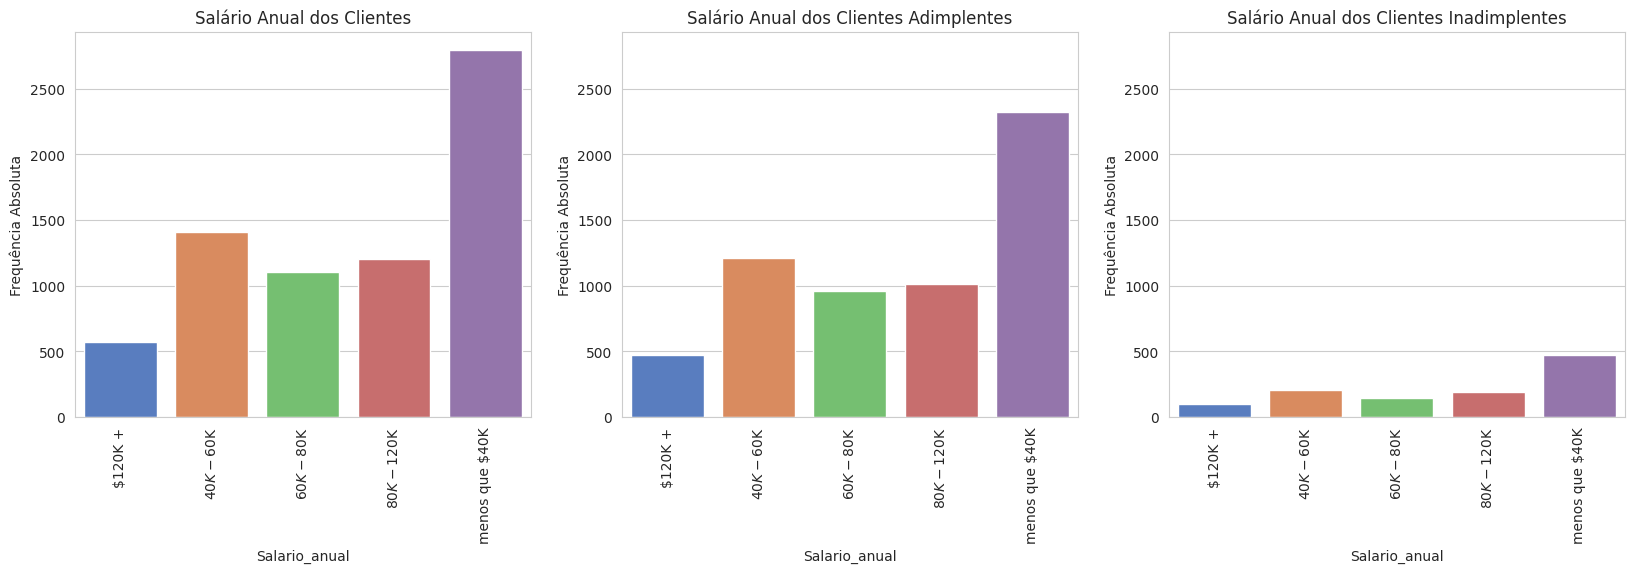

In [13]:
# Analisando a faixa de salário anual:

coluna = "salario_anual"
titulos = [
    "Salário Anual dos Clientes",
    "Salário Anual dos Clientes Adimplentes",
    "Salário Anual dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo], palette="muted")
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

A faixa salarial predominante é aquela abaixo de 40 mil por ano, e não foram identificadas diferenças significativas na distribuição entre as populações adimplente e inadimplente.

O tipo de cartão mais contratado é o "blue", porém, também não há diferenças significativas na distribuição entre as populações adimplente e inadimplente quanto a esse aspecto.

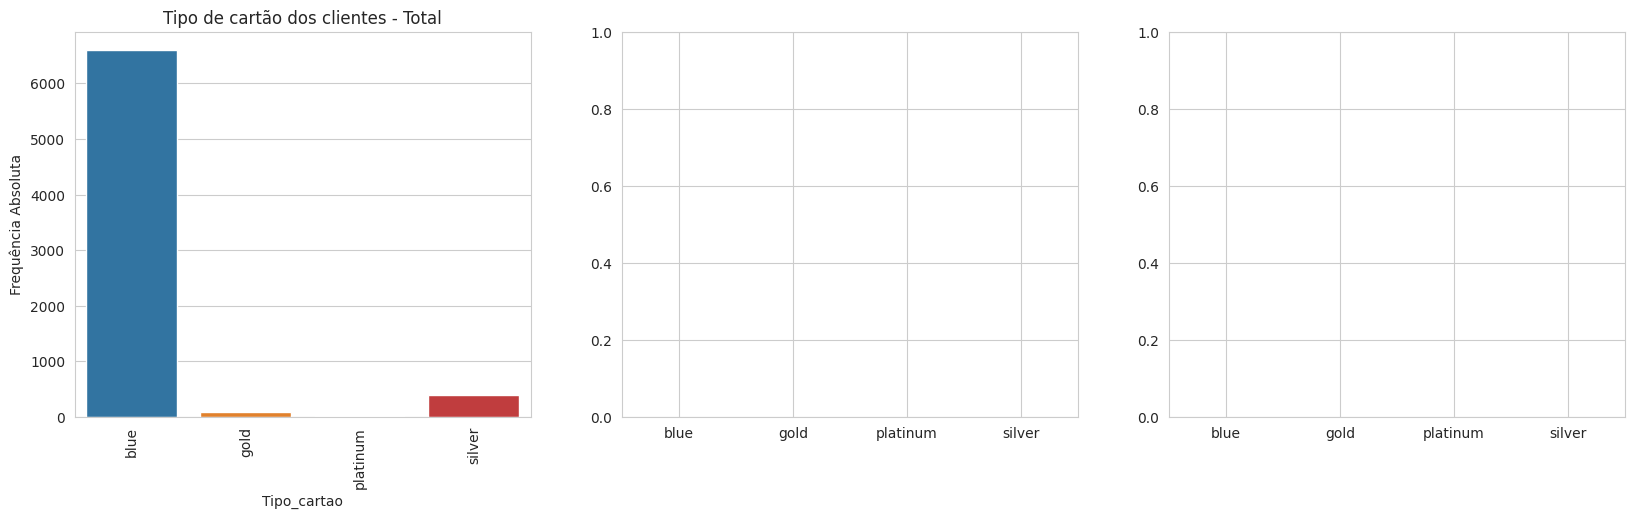

In [14]:
# Analisando o tipo de cartão contratado:

coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos clientes - Total','Tipo de cartão dos clientes Adimplentes','Tipo de cartão dos clientes Inadimplentes']


eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)



for dataframe in [df, df_adimplente, df_inadimplente]:
    
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1
    plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


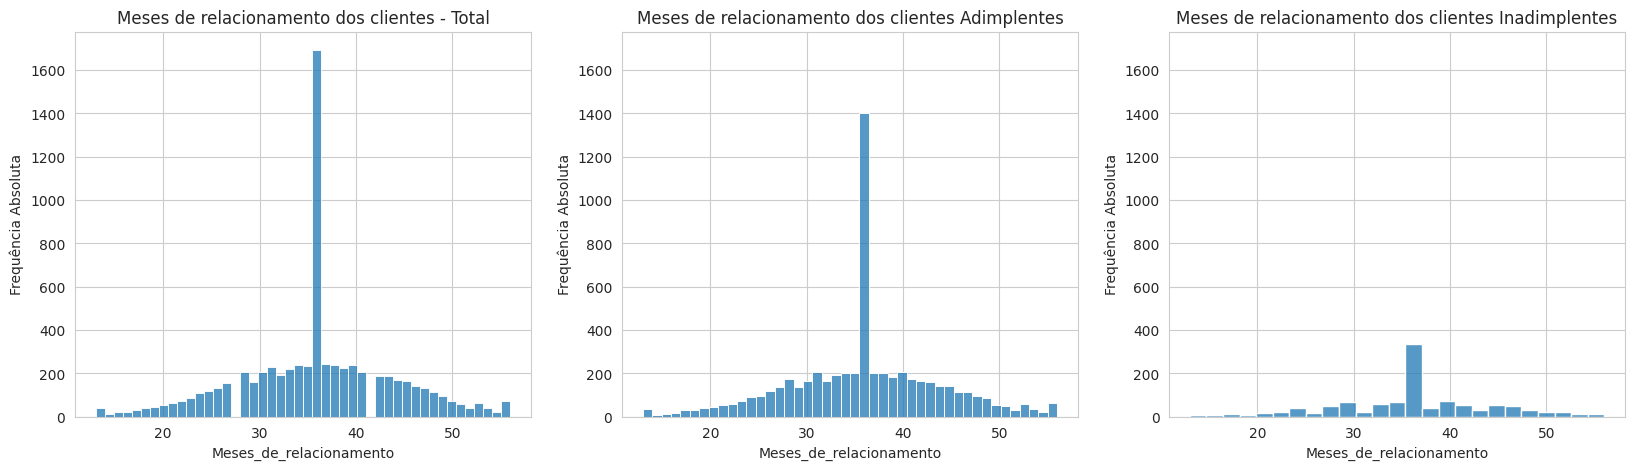

In [15]:
# Analisando os meses de relacionamento

coluna = 'meses_de_relacionamento'
titulos = ['Meses de relacionamento dos clientes - Total', 'Meses de relacionamento dos clientes Adimplentes', 'Meses de relacionamento dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.show()

O tempo de relacionamento dos clientes está predominantemente concentrado em 36 meses, porém não demonstra variação ou interferência significativa na inadimplência, exceto nos períodos de 28 e 42 meses, onde há uma menor concentração de clientes inadimplentes, afetando a distribuição do grupo total.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


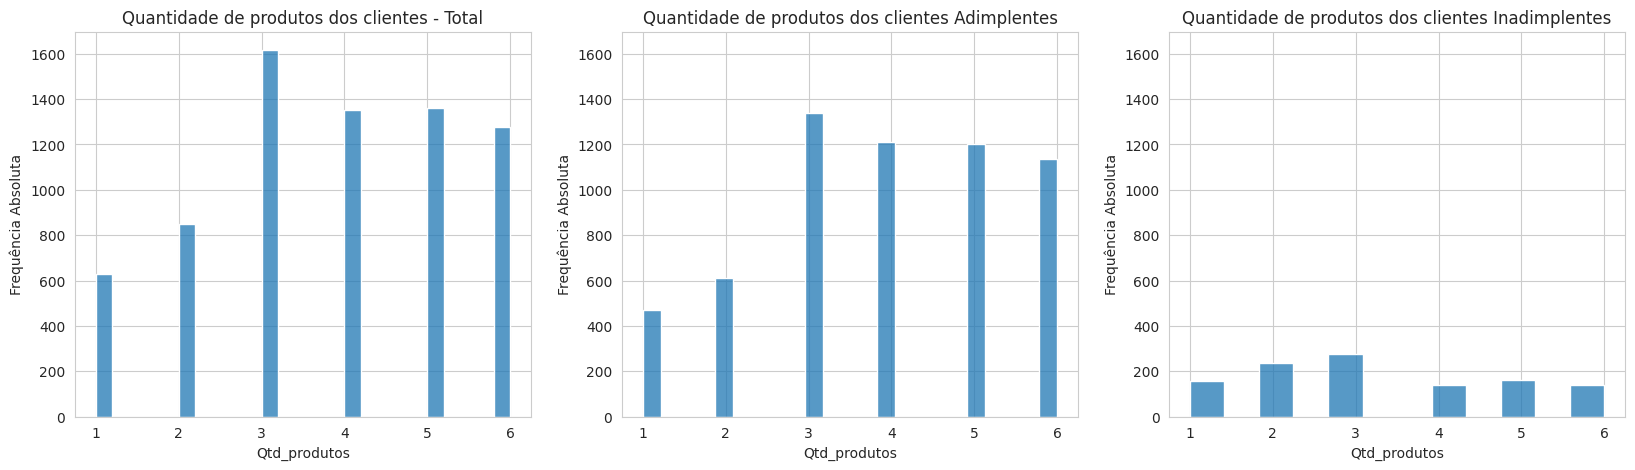

In [16]:
# Analisando a quantidade de produtos contratados

coluna = 'qtd_produtos'
titulos = ['Quantidade de produtos dos clientes - Total', 'Quantidade de produtos dos clientes Adimplentes', 'Quantidade de produtos dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.show()

De maneira isolada, a quantidade de produtos contratados mostra apenas uma discreta inversão nas colunas de 4 e 5 produtos entre adimplentes e inadimplentes, porém, sem apresentar uma variação significativa.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


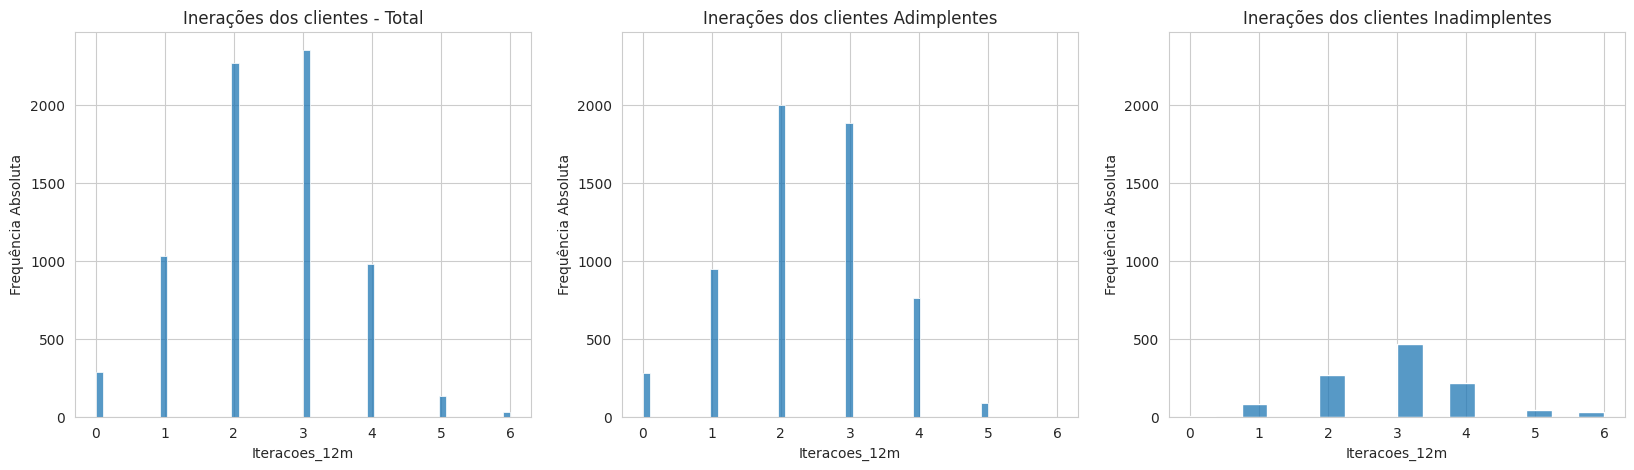

In [17]:
# Analisando as interações nos últimos 12 meses

coluna = 'iteracoes_12m'
titulos = ['Inerações dos clientes - Total', 'Inerações dos clientes Adimplentes', 'Inerações dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


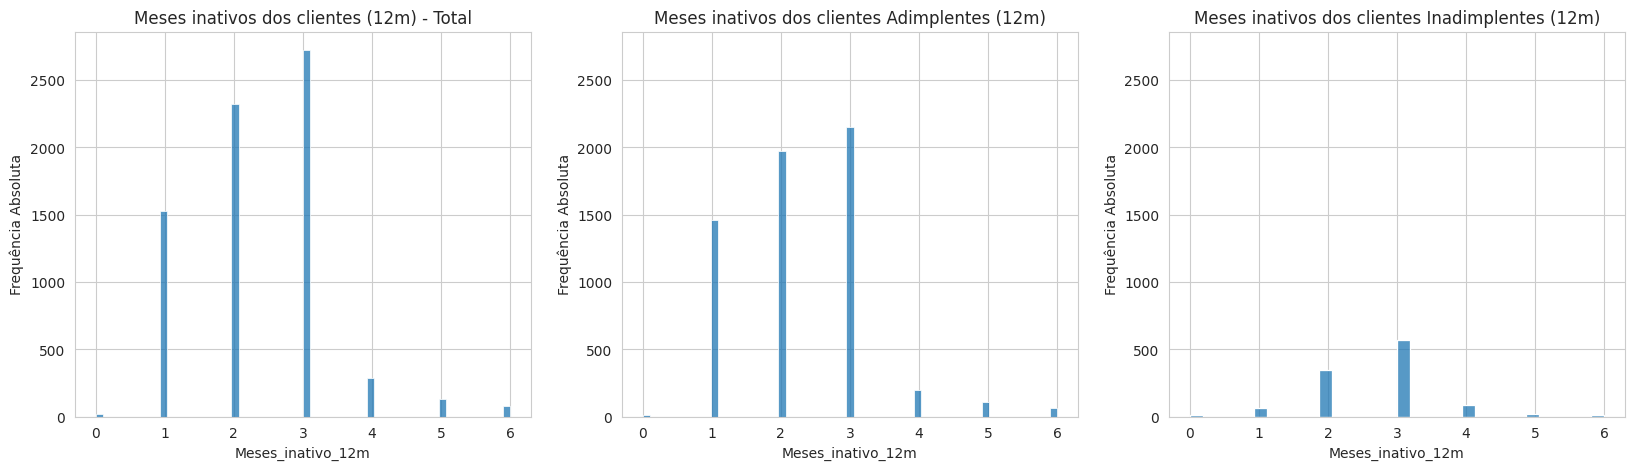

In [18]:
# Analisando meses inativos (dentro do período de 12 meses)

coluna = 'meses_inativo_12m'
titulos = ['Meses inativos dos clientes (12m) - Total', 'Meses inativos dos clientes Adimplentes (12m)', 'Meses inativos dos clientes Inadimplentes (12m)']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


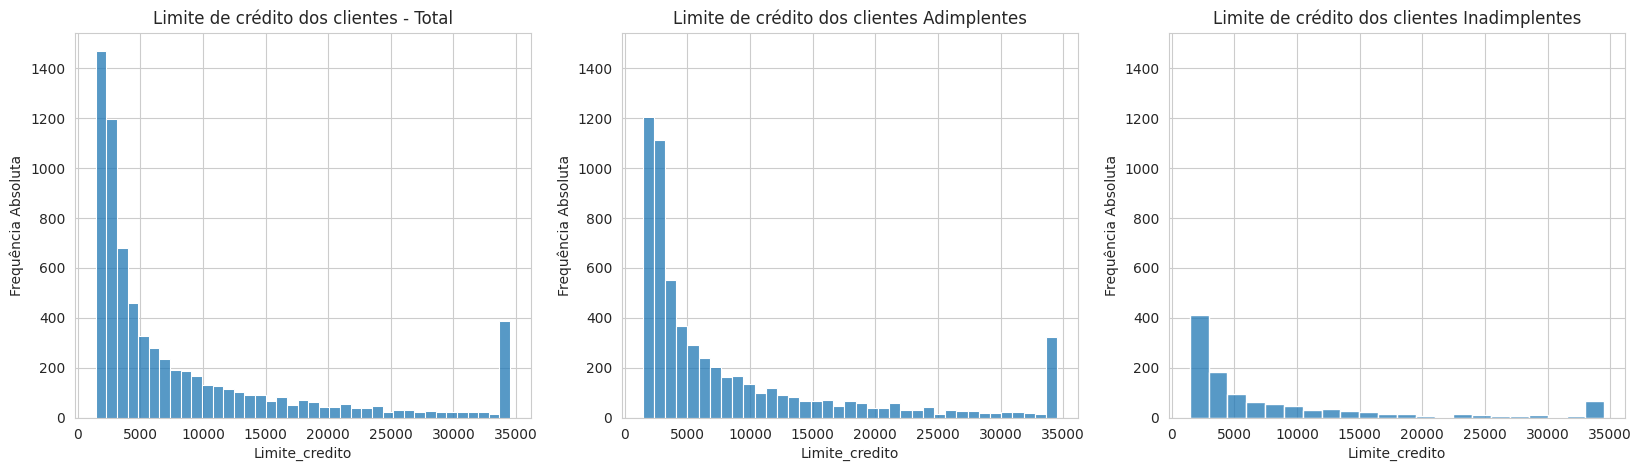

In [19]:
# Analisando o limite de crédito

coluna = 'limite_credito'
titulos = ['Limite de crédito dos clientes - Total', 'Limite de crédito dos clientes Adimplentes', 'Limite de crédito dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


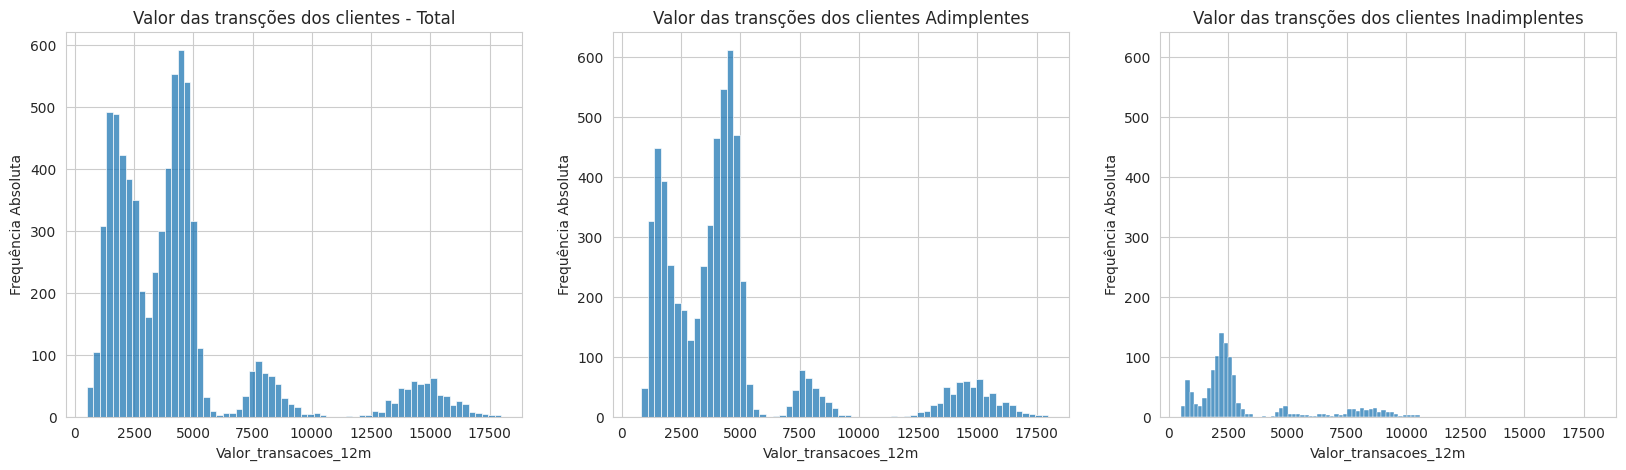

In [20]:
# Analisando o valor das transações (dentro do período de 12 meses)

coluna = 'valor_transacoes_12m'
titulos = ['Valor das transções dos clientes - Total', 'Valor das transções dos clientes Adimplentes', 'Valor das transções dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


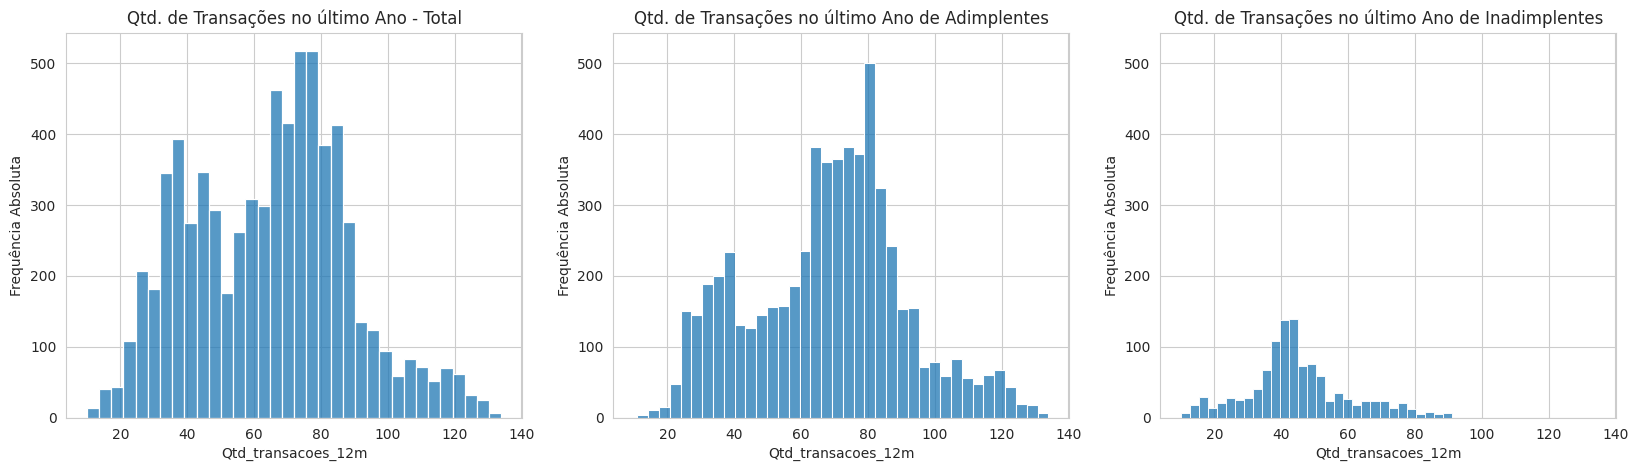

In [21]:
# Analisando a quantidade de transações (dentro de 12 meses)

coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no último Ano - Total', 'Qtd. de Transações no último Ano de Adimplentes', 'Qtd. de Transações no último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.show()

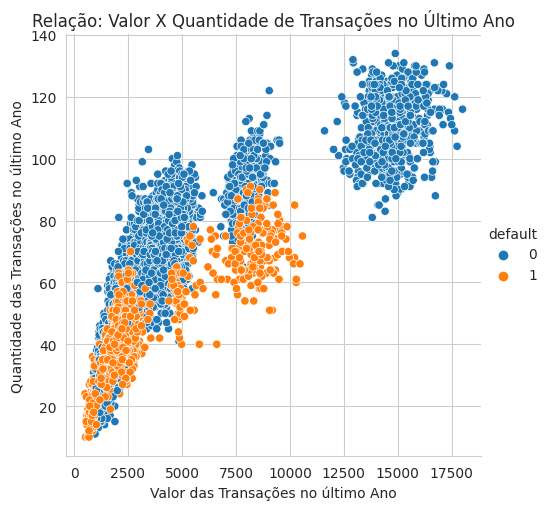

In [22]:
# Analisando a Quantidade de transações x Valor das transações

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(title='Relação: Valor X Quantidade de Transações no Último Ano', xlabel='Valor das Transações no último Ano', ylabel='Quantidade das Transações no último Ano')

# #5 Resumo das análises e possíveis observações realisadas durante o tratamento dos dados

* Os clientes cujos dados estão faltando (nulos/vazios) foram removidos da análise devido à sua falta de representatividade estatística. No entanto, é crucial destacar a importância do preenchimento completo e contínuo das informações referentes à "escolaridade", "salário anual" e "estado civil". Esses dados desempenham um papel fundamental na compreensão do perfil dos clientes e são essenciais para desenvolver estratégias eficazes de segmentação e personalização dos serviços oferecidos. O preenchimento dessas informações não apenas enriquece a base de dados, mas também permite uma análise mais precisa e abrangente, proporcionando insights valiosos para a tomada de decisões informadas e aprimoramento das práticas de atendimento ao cliente.

* Recomenda-se direcionar pesquisas e ações para os clientes com baixo volume de transações, cujos valores sejam inferiores a 2.5 mil reais. Da mesma forma, é importante direcionar atenção para os clientes com volume médio de transações, cujos valores variem entre 7 mil e 10 mil reais. Esses segmentos representam áreas de interesse estratégico, onde oportunidades de melhoria e aprimoramento dos serviços podem ser identificadas e exploradas com maior eficácia. Ao focar nesses grupos específicos, é possível desenvolver estratégias mais direcionadas e personalizadas, visando atender às necessidades e expectativas dos clientes de forma mais eficiente e eficaz.

* Não foram encontradas informações significativas que permitissem compreender o comportamento dos clientes inadimplentes em relação a métricas individuais, tais como escolaridade, salário anual, tipo de cartão, tempo de relacionamento, quantidade de produtos contratados, interações nos últimos 12 meses, meses de inatividade ou limites de crédito. Essa falta de correlação sugere que outros fatores ou uma combinação de variáveis podem estar mais fortemente associados à inadimplência dos clientes, indicando a necessidade de uma análise mais abrangente e integrada para compreender melhor esse fenômeno e desenvolver estratégias eficazes de gestão de risco e mitigação de perdas.